<a href="https://colab.research.google.com/github/DavideScassola/PML2024/blob/main/Notebooks/02_numpy_pandas_sklearn/021_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2.2: Introduction to `pandas`

Probabilistic Machine Learning -- Spring 2024, UniTS

Adapted from previous work from [Gaia Saveri](https://www.linkedin.com/in/gaia-saveri-b7059a1b7), [Ilaria Vascotto](https://www.linkedin.com/in/ilariavascotto) and [Emanuele Ballarin](https://ballarin.cc).

## What is `pandas`?


<img src="https://i.guim.co.uk/img/media/c4fe34a8aeeebd716c9442aebd8b646e56aefd93/0_162_3600_2160/master/3600.jpg?width=1200&height=900&quality=85&auto=format&fit=crop&s=85c90b55a7c0879477267e58a4bf6c36" width="400">


<img src="https://datascientest.com/en/wp-content/uploads/sites/9/2022/01/illu_pandas-82-1024x562.png" width="400">

`pandas` is an open source Python library for data handling, structuring, and ultimately analysis.


## Core data structures

`pandas` introduces two new data structures: `Series` and `DataFrame`. 

### Series

A Series in a one-dimensional object (similar to an array, list, or column in a table). A labeled index is assigned to each item in the Series (the default are 0-N indeces, being N the length of the Series minus one).

In [2]:
import pandas as pd

In [3]:
# Create a series from a list
s = pd.Series([7, "Hello world", 42.26])

print(f"Series with default index: \n{s}")

Series with default index: 
0              7
1    Hello world
2          42.26
dtype: object


In [4]:
# Create a series with a user-defined index
series_with_index = pd.Series([2, True, "Hey"], index=["A", "B", "C"])

print(f"\nSeries with user-defined index: \n{series_with_index}")


Series with user-defined index: 
A       2
B    True
C     Hey
dtype: object


In [5]:
series_with_index['A']

2

In [6]:
# Create a series from dictionary
# In this case the index is defined from the keys of the dictionary
d = {"One": 1, "Two": 2, "Three": 3}

series_from_dict = pd.Series(d)

print(f"\nSeries from dictionary: \n{series_from_dict}")


Series from dictionary: 
One      1
Two      2
Three    3
dtype: int64


In [7]:
# Indexing series
dd = {
    "Chicago": 1000,
    "New York": 1300,
    "Portland": 900,
    "San Francisco": 1100,
    "Austin": 450,
    "Boston": None,
}
cities = pd.Series(dd)

print(f"\nCities Series: \n{cities}")


Cities Series: 
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
Austin            450.0
Boston              NaN
dtype: float64


In [8]:
# Use of the index to select specific items (by "name")
c = cities[["New York", "San Francisco", "Boston"]]
print(c)

New York         1300.0
San Francisco    1100.0
Boston              NaN
dtype: float64


In [9]:
# Change the value within a Series
cities["Austin"] = 500
cities

Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
Austin            500.0
Boston              NaN
dtype: float64

In [10]:
# Algebraic operations
s = pd.Series([1, 2, 3], index=["A", "B", "C"])

print(f"\ns + 10: \n{s + 10}")
print(f"\ns*2: \n{s*2}")


s + 10: 
A    11
B    12
C    13
dtype: int64

s*2: 
A    2
B    4
C    6
dtype: int64


In [11]:
# Logical operations
cities > 1000

Chicago          False
New York          True
Portland         False
San Francisco     True
Austin           False
Boston           False
dtype: bool

In [12]:
# "Addition" of two series
# Returns a union of the two series with the addition of same-indexed values, NaN for missing values
s1 = pd.Series([1, 2, 3], index=["A", "B", "C"])
s2 = pd.Series([4, 5, 6], index=["A", "D", "C"])

print(f"\ns1: \n{s1}")
print(f"\ns2: \n{s2}")
print(f"\ns1 + s2: \n{s1 + s2}")


s1: 
A    1
B    2
C    3
dtype: int64

s2: 
A    4
D    5
C    6
dtype: int64

s1 + s2: 
A    5.0
B    NaN
C    9.0
D    NaN
dtype: float64


In [29]:
# Use of boolean indexing for selection (by "property")
cities < 1000

Chicago          False
New York         False
Portland          True
San Francisco    False
Austin            True
Boston           False
dtype: bool

In [30]:
cc = cities[cities < 1000]
print(cc)

Portland    900.0
Austin      500.0
dtype: float64


In [31]:
# Reduction operations (sum, mean, max, etc...)
s = pd.Series([1, 2, 3], index=["A", "B", "C"])

s.sum()

6

### DataFrame

A `DataFrame` is a tabular data structure comprised of rows and columns. It can be thought of as a group of Series objects that share an index (the columns' name). 

#### Reading data

In order to create manually a DataFrame we can pass a dictionary of lists to the DataFrame constructor:

In [15]:
data = {
    "letters": ["A", "B", "C", "D"],
    "numbers": [1, 2, 3, 4],
    "spelling": ["One", "Two", "Three", "Four"],
}

letters_numbers = pd.DataFrame(data, columns=["letters", "numbers", "spelling"])
print(letters_numbers)

  letters  numbers spelling
0       A        1      One
1       B        2      Two
2       C        3    Three
3       D        4     Four


More often we have a dataset that we want to read into a DataFrame.
With pandas it's possible to load data stored in many formats, but the most common is probably *CSV*
Yuo can use the `read_csv` function to do it, passing the location of the file (it works also with links to web resources!)

In [16]:
# import csv dataset
path_csv = "https://raw.githubusercontent.com/GaiaSaveri/intro-to-ml/main/data/ign.csv"
reviews = pd.read_csv(path_csv, index_col=0)
reviews

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
...,...,...,...,...,...,...,...,...,...,...
18620,Good,Tokyo Mirage Sessions #FE,/games/fire-emblem-x-shin-megami-tensei/wii-u-...,Wii U,7.6,RPG,N,2016,6,29
18621,Amazing,LEGO Star Wars: The Force Awakens,/games/lego-star-wars-the-force-awakens/ps4-20...,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29
18622,Mediocre,Star Ocean: Integrity and Faithlessness,/games/star-ocean-5/ps4-20035681,PlayStation 4,5.8,RPG,N,2016,6,28
18623,Masterpiece,Inside,/games/inside-playdead/xbox-one-121435,Xbox One,10.0,Adventure,Y,2016,6,28


#### Indexing

`pandas` supports several methods for indexing data in a table:

* `iloc` (integer based indexing): refers to rows and columns by their position, expressed as an integer starting from zero;
* `loc` (label based indexing): uses row and column name;
* Boolean indexing: uses boolean masks. Row names are stored in the field `index` of a data frame, columns names are stored in the field `columns`. 

In [17]:
# Selection of a subset of rows and columns of the dataframe
print(reviews.iloc[0:10, 0:2])  # first ten rows, first two columns

  score_phrase                                              title
0      Amazing                            LittleBigPlanet PS Vita
1      Amazing  LittleBigPlanet PS Vita -- Marvel Super Hero E...
2        Great                               Splice: Tree of Life
3        Great                                             NHL 13
4        Great                                             NHL 13
5         Good                          Total War Battles: Shogun
6        Awful                                Double Dragon: Neon
7      Amazing                                       Guild Wars 2
8        Awful                                Double Dragon: Neon
9         Good                          Total War Battles: Shogun


In [18]:
# Selection of a subset of rows of the dataframe
restricted_reviews = reviews.loc[10:20]  # rows from ten to twenty
restricted_reviews

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
12,Good,Wild Blood,/games/wild-blood/iphone-139363,iPhone,7.0,NaN,N,2012,9,10
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7
15,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/mac-2001...,Macintosh,6.5,Adventure,N,2012,9,6
16,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/pc-137135,PC,6.5,Adventure,N,2012,9,6
17,Great,Avengers Initiative,/games/avengers-initiative/iphone-141579,iPhone,8.0,Action,N,2012,9,5
18,Mediocre,Way of the Samurai 4,/games/way-of-the-samurai-4/ps3-23516,PlayStation 3,5.5,"Action, Adventure",N,2012,9,3
19,Good,JoJo's Bizarre Adventure HD,/games/jojos-bizarre-adventure/xbox-360-137717,Xbox 360,7.0,Fighting,N,2012,9,3


In [19]:
# Selection of a subset of rows and columns using columns' names
reviews.loc[0:10, ["title", "score"]]

,title,score
0,LittleBigPlanet PS Vita,9.0
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,9.0
2,Splice: Tree of Life,8.5
3,NHL 13,8.5
4,NHL 13,8.5
5,Total War Battles: Shogun,7.0
6,Double Dragon: Neon,3.0
7,Guild Wars 2,9.0
8,Double Dragon: Neon,3.0
9,Total War Battles: Shogun,7.0


In [20]:
# Selection a subset of columns by their names, keeping all rows
reviews[["title", "score"]]

,title,score
0,LittleBigPlanet PS Vita,9.0
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,9.0
2,Splice: Tree of Life,8.5
3,NHL 13,8.5
4,NHL 13,8.5
...,...,...
18620,Tokyo Mirage Sessions #FE,7.6
18621,LEGO Star Wars: The Force Awakens,9.0
18622,Star Ocean: Integrity and Faithlessness,5.8
18623,Inside,10.0


In [32]:
# Extract a Series from a DataFrame
reviews["score"]

0         9.0
1         9.0
2         8.5
3         8.5
4         8.5
         ... 
18620     7.6
18621     9.0
18622     5.8
18623    10.0
18624    10.0
Name: score, Length: 18625, dtype: float64

In [21]:
# Indexing using boolean masks
mask = reviews["score"] >= 9.5
mask  # series of booleans

0        False
1        False
2        False
3        False
4        False
         ...  
18620    False
18621    False
18622    False
18623     True
18624     True
Name: score, Length: 18625, dtype: bool

In [22]:
# Retrieval of title of the games with a score >=9.5
cool_games = reviews[mask]["title"]
print(cool_games)

33                   Pokemon White Version 2
35                   Pokemon Black Version 2
52       The World Ends with You: Solo Remix
54       The World Ends with You: Solo Remix
135        Zero Escape: Virtue's Last Reward
                        ...                 
18511                                 Inside
18562                Odin Sphere Leifthrasir
18563                Odin Sphere Leifthrasir
18623                                 Inside
18624                                 Inside
Name: title, Length: 385, dtype: object


The following are some functions that can be used to get information about a DataFrame and do some maths with numeric columns:

## And beyond...

What has been described so far is just a small portion of what `pandas` can do for you. A more in-depth and systematic analysis (partially overlapping with that just done) can be found [here](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/).

## A bit of Data Visualization with Matplotlib

The most widely used library for making graphs is matplotlib

In [23]:
import matplotlib.pyplot as plt

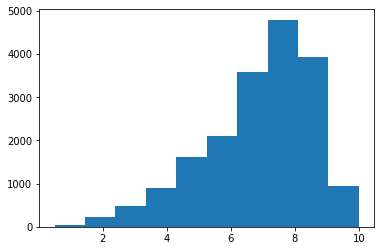

In [24]:
# histogram
_ = plt.hist(reviews["score"])

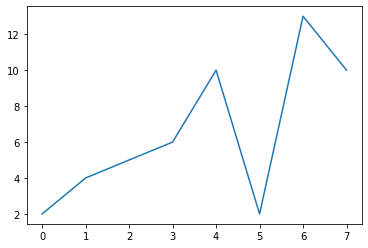

In [25]:
# plot a series of numbers (the x axis is the index of the series, by default a sequence of integers starting from 0)
y = [2, 4, 5, 6, 10, 2, 13, 10]
_ = plt.plot(y)

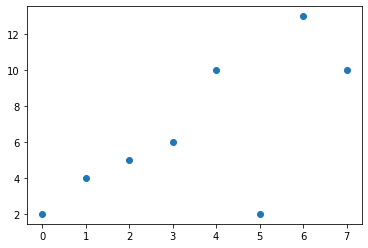

In [26]:
# we can modify the style of the plot
_ = plt.plot(y, 'o')

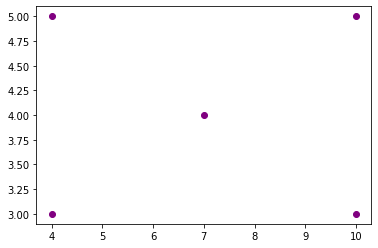

In [27]:
# We can show a set of coordinates (x, y)
x = [10, 10, 4, 4, 7]
y = [5, 3, 5, 3, 4]

_ = plt.plot(x, y, 'o', color='purple')

It is also possible to make more complex graphs, but it is often necessary to look for examples for each specific case on the internet, e.g., "barplot with matplotlib."

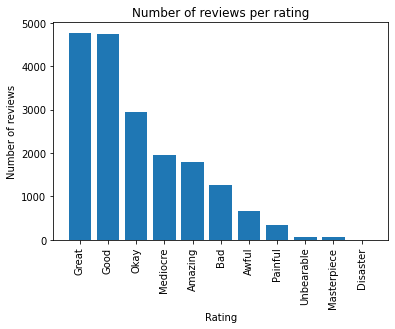

In [28]:
counts_per_genre = reviews['score_phrase'].value_counts()
plt.bar(counts_per_genre.index, counts_per_genre)
plt.xticks(rotation=90)

# We can add the title and the labels of the axes
plt.title('Number of reviews per rating')
plt.xlabel('Rating')
_ = plt.ylabel('Number of reviews')

Remember that it is not important to remember how to make each type of chart, instead you need to know how to search for what you need on the internet and adapt it to your case!